<a href="https://colab.research.google.com/github/IbrahimKhan77/my_data/blob/main/Main_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

#!pip install category_encoders
import category_encoders as ce

In [4]:
!git clone https://github.com/IbrahimKhan77/my_data.git

Cloning into 'my_data'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 49 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [5]:
df = pd.read_excel("/content/my_data/Survey_Data.xlsx")
df

,Gender,Mode_of_study,Year_of_study,Home_wi-fi_access,home_desktop/laptop_access,solely_for_your_use?,Device_use_for_learning,Self_Digital_knowlwedge_and_skills_rating,Question 1,Question 2,...,Question 19,Question 20,Question 21,Question 22,Question 23,Question 24,Question 25,Question 26,Question 27,Question 28
0,Male,Full-time,3,Yes,No,NaN,3,6,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
1,Male,Full-time,3,Yes,Yes,Yes,"3,2,1",8,Agree,Agree,...,Agree,Agree,Strongly agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Agree
2,Female,Full-time,3,Yes,Yes,Yes,4 1,4,Somewhat agree,Somewhat disagree,...,Neutral,Neutral,Disagree,Neutral,Neutral,Agree,Somewhat disagree,Agree,Somewhat disagree,Somewhat disagree
3,Male,Full-time,3,Yes,Yes,Yes,231,6,Somewhat agree,Agree,...,Somewhat agree,Neutral,Somewhat agree,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Agree
4,Female,Full-time,3,Yes,Yes,Yes,"(3) ,(1), (2)",8,Neutral,Strongly disagree,...,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Somewhat agree,Somewhat agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Female,Full-time,3,Yes,Yes,Yes,3,4,Somewhat disagree,Somewhat disagree,...,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Agree,Agree,Somewhat agree,Neutral,Neutral,Somewhat agree
421,Male,Full-time,1,Yes,Yes,Yes,123,7,Somewhat disagree,Agree,...,Neutral,Somewhat disagree,Agree,Strongly agree,Strongly disagree,Neutral,Somewhat agree,Strongly disagree,Somewhat agree,Somewhat agree
422,Female,Full-time,3,Yes,Yes,Yes,"2, 1, 3",8,Somewhat agree,Somewhat agree,...,Somewhat disagree,Neutral,Agree,Somewhat agree,Agree,Disagree,Somewhat agree,Strongly disagree,Somewhat disagree,Disagree
423,Female,Full-time,1,Yes,Yes,No,3,6,Agree,Agree,...,Agree,Somewhat agree,Agree,Neutral,Disagree,Disagree,Neutral,Somewhat agree,Agree,Agree


In [ ]:
# This is my groud truth, label, dependent variable
df['Question 28'].value_counts(normalize=True)

Neutral              0.235294
Somewhat agree       0.200000
Agree                0.190588
Somewhat disagree    0.141176
Strongly disagree    0.101176
Disagree             0.084706
Strongly agree       0.047059
Name: Question 28, dtype: float64

By above , we could say that 23% students are neautral and 43% agree, rest disagree

**Univariate Data-viz**


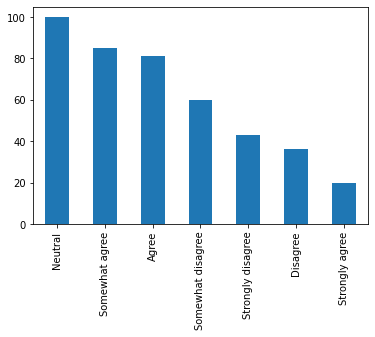

In [ ]:
df['Question 28'].value_counts().plot(kind="bar")

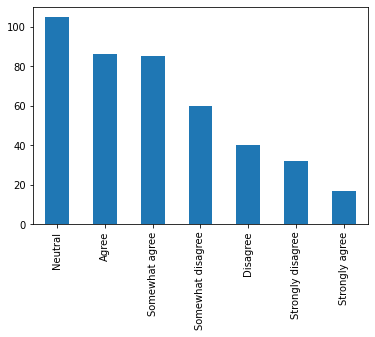

In [ ]:
df['Question 27'].value_counts().plot(kind="bar")

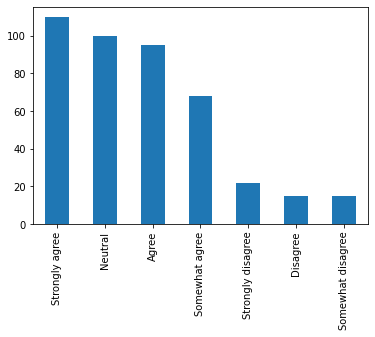

In [ ]:
df['Question 10'].value_counts().plot(kind="bar")

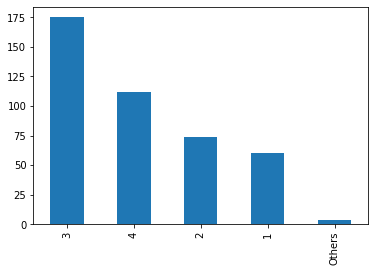

In [ ]:
df['Year_of_study'].value_counts().plot(kind="bar")

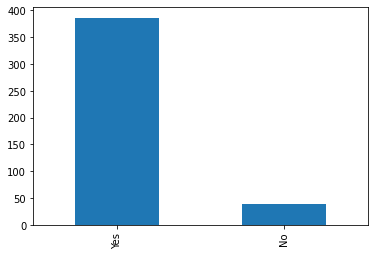

In [ ]:
df['Home_wi-fi_access '].value_counts().plot(kind="bar")

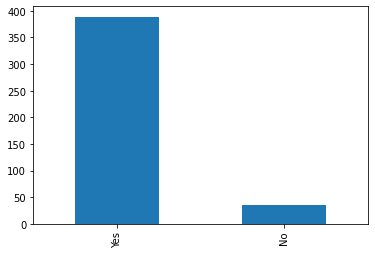

In [ ]:
df['home_desktop/laptop_access'].value_counts().plot(kind="bar")

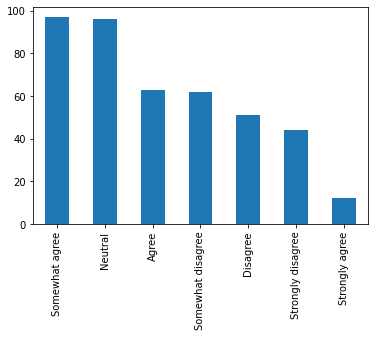

In [ ]:
df['Question 11'].value_counts().plot(kind="bar")

**Bi-variate Data-viz**

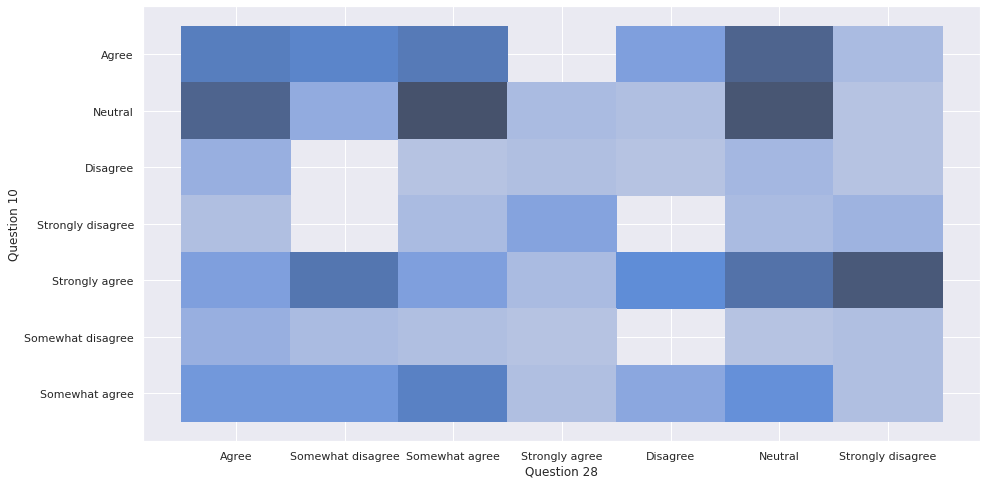

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(x='Question 28' , y='Question 10' , data=df)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Gender                                     425 non-null    object
 1   Mode_of_study                              425 non-null    object
 2   Year_of_study                              425 non-null    object
 3   Home_wi-fi_access                          425 non-null    object
 4   home_desktop/laptop_access                 425 non-null    object
 5   solely_for_your_use?                       387 non-null    object
 6   Device_use_for_learning                    425 non-null    object
 7   Self_Digital_knowlwedge_and_skills_rating  425 non-null    int64 
 8   Question 1                                 425 non-null    object
 9   Question 2                                 425 non-null    object
 10  Question 3                            

We see that - 

1.   Categorical columns with Questions needs to be converted to Numerical
2.   Only one column "solely_for_your_use?" is having missing values and rest all the columns have complete values, therefore missing values needs to be imputed 


**1 - Converting Categorical column into Numerical using Ordinal Encoding (Scikit learn)**


In [29]:
satisfaction_dict = {'Strongly agree': 1,'Agree': 2,'Somewhat agree': 3,'Neutral': 4,"Somewhat disagree":5, 'Disagree': 6,"Strongly disagree":7}
satisfaction_dict

df["Question_1"] = df['Question 1'].map(satisfaction_dict)
df["Question_2"] = df['Question 2'].map(satisfaction_dict)
df["Question_3"] = df['Question 3'].map(satisfaction_dict)
df["Question_4"] = df['Question 4'].map(satisfaction_dict)
df["Question_5"] = df['Question 5'].map(satisfaction_dict)
df["Question_6"] = df['Question 6'].map(satisfaction_dict)
df["Question_7"] = df['Question 7'].map(satisfaction_dict)
df["Question_8"] = df['Question 8'].map(satisfaction_dict)
df["Question_9"] = df['Question 9'].map(satisfaction_dict)
df["Question_10"] = df['Question 10'].map(satisfaction_dict)
df["Question_11"] = df['Question 11'].map(satisfaction_dict)
df["Question_12"] = df['Question 12'].map(satisfaction_dict)
df["Question_13"] = df['Question 13'].map(satisfaction_dict)
df["Question_14"] = df['Question 14'].map(satisfaction_dict)
df["Question_15"] = df['Question 15'].map(satisfaction_dict)
df["Question_16"] = df['Question 16'].map(satisfaction_dict)
df["Question_17"] = df['Question 17'].map(satisfaction_dict)
df["Question_18"] = df['Question 18'].map(satisfaction_dict)
df["Question_19"] = df['Question 19'].map(satisfaction_dict)
df["Question_20"] = df['Question 20'].map(satisfaction_dict)
df["Question_21"] = df['Question 21'].map(satisfaction_dict)
df["Question_22"] = df['Question 22'].map(satisfaction_dict)
df["Question_23"] = df['Question 23'].map(satisfaction_dict)
df["Question_24"] = df['Question 24'].map(satisfaction_dict)
df["Question_25"] = df['Question 25'].map(satisfaction_dict)
df["Question_26"] = df['Question 26'].map(satisfaction_dict)
df["Question_27"] = df['Question 27'].map(satisfaction_dict)


# Dependent variable
df["Question_28"] = df['Question 28'].map(satisfaction_dict)

**2 - Checking unique values in the column having missing values and imputing them with the Mode**

In [30]:
df['solely_for_your_use?'].value_counts(normalize=True)

Yes    0.803618
No     0.196382
Name: solely_for_your_use?, dtype: float64

In [31]:
most_frequent_category = df["solely_for_your_use?"].mode()[0]
    
df["solely_for_your_use?_Imp"] = df["solely_for_your_use?"]
df["solely_for_your_use?_Imp"].fillna(most_frequent_category, inplace=True)

**Displaying the dataset again after the changes**

In [32]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Gender                                     425 non-null    object
 1   Mode_of_study                              425 non-null    object
 2   Year_of_study                              425 non-null    object
 3   Home_wi-fi_access                          425 non-null    object
 4   home_desktop/laptop_access                 425 non-null    object
 5   solely_for_your_use?                       387 non-null    object
 6   Device_use_for_learning                    425 non-null    object
 7   Self_Digital_knowlwedge_and_skills_rating  425 non-null    int64 
 8   Question 1                                 425 non-null    object
 9   Question 2                                 425 non-null    object
 10  Question 3                            

,Gender,Mode_of_study,Year_of_study,Home_wi-fi_access,home_desktop/laptop_access,solely_for_your_use?,Device_use_for_learning,Self_Digital_knowlwedge_and_skills_rating,Question 1,Question 2,...,Question_20,Question_21,Question_22,Question_23,Question_24,Question_25,Question_26,Question_27,solely_for_your_use?_Imp,Question_28
0,Male,Full-time,3,Yes,No,NaN,3,6,Agree,Agree,...,2,2,2,2,2,2,2,2,Yes,2
1,Male,Full-time,3,Yes,Yes,Yes,"3,2,1",8,Agree,Agree,...,2,1,2,2,4,4,4,2,Yes,2
2,Female,Full-time,3,Yes,Yes,Yes,4 1,4,Somewhat agree,Somewhat disagree,...,4,6,4,4,2,5,2,5,Yes,5
3,Male,Full-time,3,Yes,Yes,Yes,231,6,Somewhat agree,Agree,...,4,3,2,2,2,2,2,3,Yes,2
4,Female,Full-time,3,Yes,Yes,Yes,"(3) ,(1), (2)",8,Neutral,Strongly disagree,...,2,1,1,1,3,2,1,3,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Female,Full-time,3,Yes,Yes,Yes,3,4,Somewhat disagree,Somewhat disagree,...,5,3,5,2,2,3,4,4,Yes,3
421,Male,Full-time,1,Yes,Yes,Yes,123,7,Somewhat disagree,Agree,...,5,2,1,7,4,3,7,3,Yes,3
422,Female,Full-time,3,Yes,Yes,Yes,"2, 1, 3",8,Somewhat agree,Somewhat agree,...,4,2,3,2,6,3,7,5,Yes,6
423,Female,Full-time,1,Yes,Yes,No,3,6,Agree,Agree,...,3,2,4,6,6,4,3,2,No,2


Now both the issues have been resolved

In [33]:
df['solely_for_your_use?_Imp'].value_counts(normalize=True)

Yes    0.821176
No     0.178824
Name: solely_for_your_use?_Imp, dtype: float64

We see that there is very insignificant change in %(from 80% to 82% in "YES" and from 20% to 17.8% in "NO") after imputing misisng vaues with mode.

**Now converting the Categorical columns with Demographic details into numberical USING OneHot Encoder**

In [34]:
ce_OHE = ce.OneHotEncoder(cols=["Gender","Mode_of_study","Home_wi-fi_access ","home_desktop/laptop_access"])

data1 = ce_OHE.fit_transform(df)
data1.head()

,Gender_1,Gender_2,Mode_of_study_1,Mode_of_study_2,Year_of_study,Home_wi-fi_access _1,Home_wi-fi_access _2,home_desktop/laptop_access_1,home_desktop/laptop_access_2,solely_for_your_use?,...,Question_20,Question_21,Question_22,Question_23,Question_24,Question_25,Question_26,Question_27,solely_for_your_use?_Imp,Question_28
0,1,0,1,0,3,1,0,1,0,NaN,...,2,2,2,2,2,2,2,2,Yes,2
1,1,0,1,0,3,1,0,0,1,Yes,...,2,1,2,2,4,4,4,2,Yes,2
2,0,1,1,0,3,1,0,0,1,Yes,...,4,6,4,4,2,5,2,5,Yes,5
3,1,0,1,0,3,1,0,0,1,Yes,...,4,3,2,2,2,2,2,3,Yes,2
4,0,1,1,0,3,1,0,0,1,Yes,...,2,1,1,1,3,2,1,3,Yes,3


Chnage one hot end=coder to Get Dummies, 
Drop column "Device_use_for_learning"


**Dropping the un-necessary columns**

In [36]:
df2 = data1.drop(labels=['Question 1','solely_for_your_use?','Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8',
                         'Question 9','Question 10','Question 11','Question 12','Question 13','Question 14','Question 15','Question 16','Question 17',
                         'Question 18','Question 19','Question 20','Question 21','Question 22','Question 23','Question 24','Question 25','Question 26',
                         'Question 27','Question 28','Device_use_for_learning'], axis=1)
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Gender_1                                   425 non-null    int64 
 1   Gender_2                                   425 non-null    int64 
 2   Mode_of_study_1                            425 non-null    int64 
 3   Mode_of_study_2                            425 non-null    int64 
 4   Year_of_study                              425 non-null    object
 5   Home_wi-fi_access _1                       425 non-null    int64 
 6   Home_wi-fi_access _2                       425 non-null    int64 
 7   home_desktop/laptop_access_1               425 non-null    int64 
 8   home_desktop/laptop_access_2               425 non-null    int64 
 9   Self_Digital_knowlwedge_and_skills_rating  425 non-null    int64 
 10  Question_1                            

,Gender_1,Gender_2,Mode_of_study_1,Mode_of_study_2,Year_of_study,Home_wi-fi_access _1,Home_wi-fi_access _2,home_desktop/laptop_access_1,home_desktop/laptop_access_2,Self_Digital_knowlwedge_and_skills_rating,...,Question_20,Question_21,Question_22,Question_23,Question_24,Question_25,Question_26,Question_27,solely_for_your_use?_Imp,Question_28
0,1,0,1,0,3,1,0,1,0,6,...,2,2,2,2,2,2,2,2,Yes,2
1,1,0,1,0,3,1,0,0,1,8,...,2,1,2,2,4,4,4,2,Yes,2
2,0,1,1,0,3,1,0,0,1,4,...,4,6,4,4,2,5,2,5,Yes,5
3,1,0,1,0,3,1,0,0,1,6,...,4,3,2,2,2,2,2,3,Yes,2
4,0,1,1,0,3,1,0,0,1,8,...,2,1,1,1,3,2,1,3,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,1,1,0,3,1,0,0,1,4,...,5,3,5,2,2,3,4,4,Yes,3
421,1,0,1,0,1,1,0,0,1,7,...,5,2,1,7,4,3,7,3,Yes,3
422,0,1,1,0,3,1,0,0,1,8,...,4,2,3,2,6,3,7,5,Yes,6
423,0,1,1,0,1,1,0,0,1,6,...,3,2,4,6,6,4,3,2,No,2


In [82]:
#reg = LinearRegression()
#X = df.values[:,35]
#Y = df.values[:,-1]

#model = reg.fit(X,Y)
#model.summary()

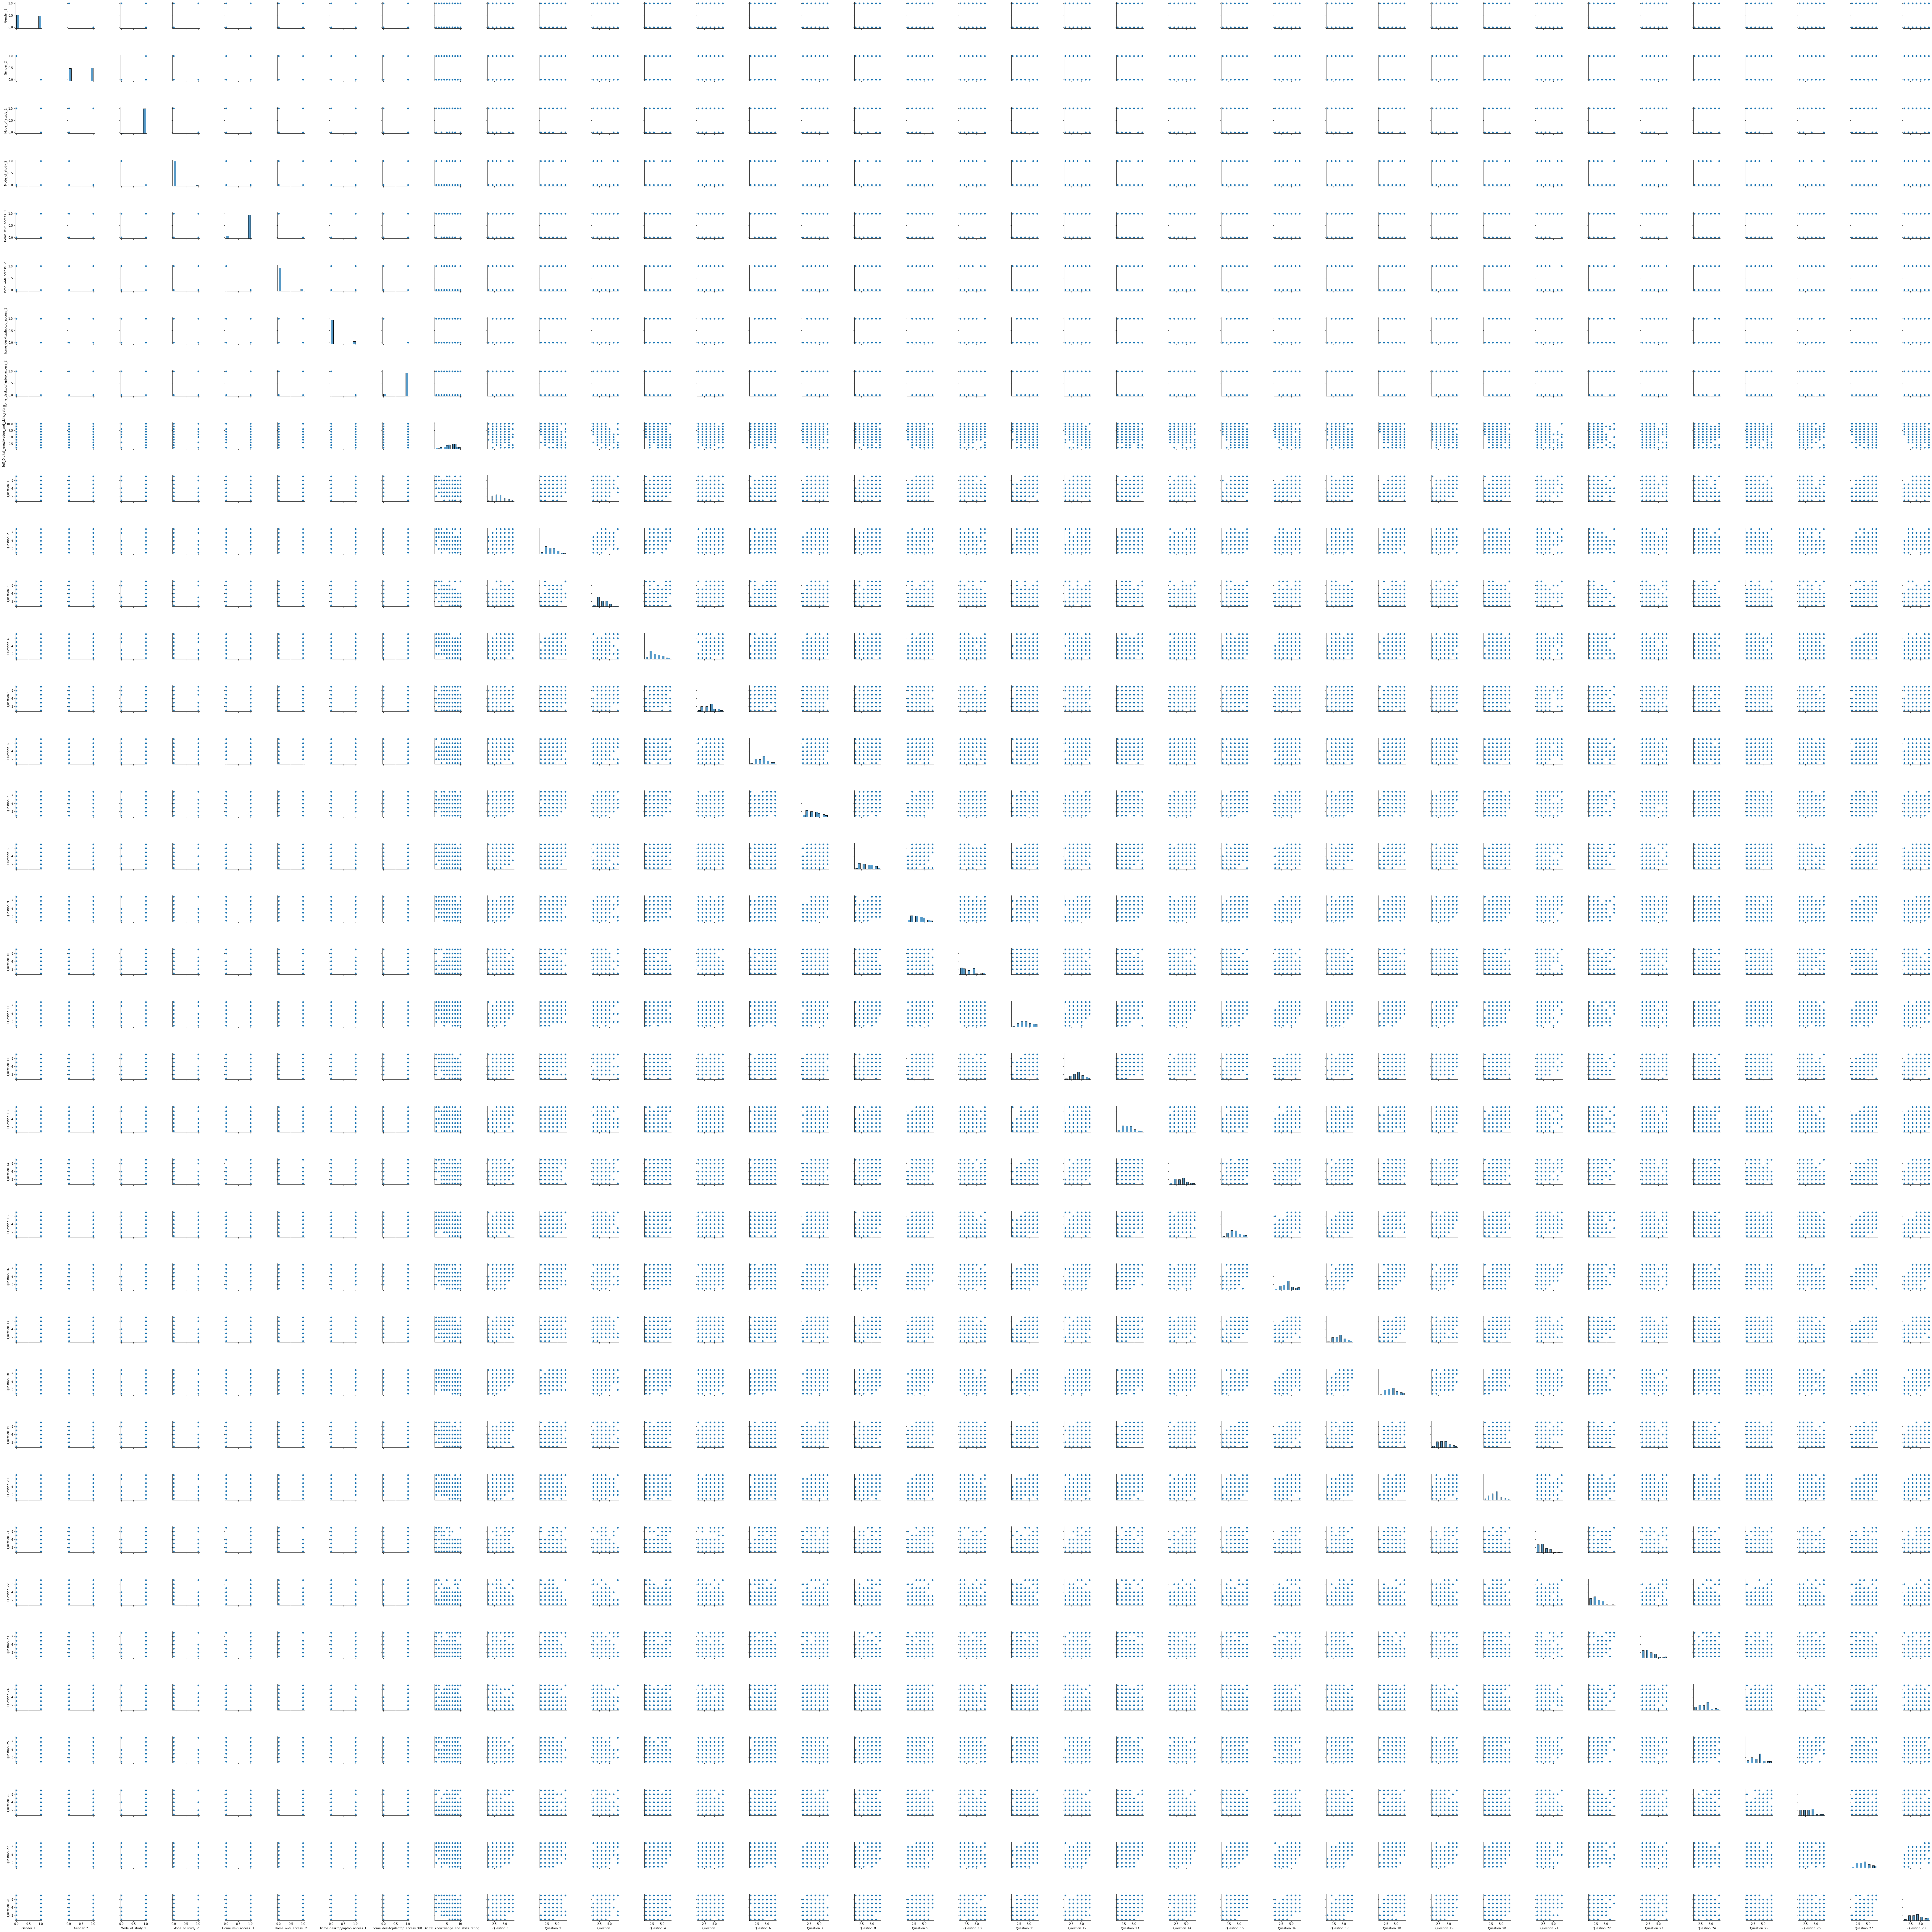

In [37]:
import seaborn as sns
sns.pairplot(df2)